In [17]:
# -*- coding:utf-8 -*-
import pandas as pd

In [18]:
# 参数初始化
inputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/data/consumption_data.xls'   # 销量及其他属性数据
outputfile = '/Users/admin/PycharmProjects/pythonProject1/python_da/chapter5/demo/tmp/data_type.xls'          # 保存结果的文件名

In [19]:
k = 3   # 聚类个数为 3
iteration = 500 #聚类最大循环次数 = 500  # 聚类最大循环次数
data = pd.read_excel(inputfile, index_col='Id')
data_zs = 1.0*(data - data.mean()/data.std())     # 数据标准化

           R          F            M  类别数目
0  15.974088   9.780293  1526.539800   463
1  14.885383   6.785085   534.664962   471
2  27.084959  13.520753  6328.754527     6


/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_41389/1859948562.py:17: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  r.to_excel(outputfile) #保存结果
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/var/folders/r6/jncwg9151xz9kkqq_ky369vw0000gn/T/ipykernel_41389/1859948562.py:31: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))
/var/folders/r6/jnc

FileNotFoundError: [Errno 2] No such file or directory: '../tmp/pd_0.png'

/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/anaconda3/envs/pythonProject1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


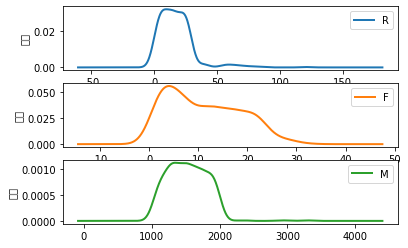

In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration) #分为k类，并发数4
model.fit(data_zs) #开始聚类


#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(data.columns) + [u'类别数目'] #重命名表头
print(r)


#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.to_excel(outputfile) #保存结果


def density_plot(data): #自定义作图函数
  import matplotlib.pyplot as plt
  plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
  plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
  p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
  [p[i].set_ylabel(u'密度') for i in range(k)]
  plt.legend()
  return plt

pic_output = '../tmp/pd_' #概率密度图文件名前缀
for i in range(k):
  density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output, i))